<a href="https://colab.research.google.com/github/foramirez50/CDA/blob/main/Copy_of_Taller1CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 63.2 MB/s 
     |████████████████████████████████| 690 kB 32.2 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |████████████████████████████████| 812 kB 51.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=601e1b4a4e75eb00d2f51d299675adbe3b5e1de9cb791e29370586224e3cd7b8
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=cc5d04b5395b19ace58b2e62968cc03ba51b712d319bd223e2e9d1e665ef3b40
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin i

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importing libraries
from google.colab import drive
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path="/content/drive/MyDrive/Colab Notebooks/MOD1.csv"
df = pd.read_csv(path)

df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,FALSE,2000,77,0.751,0.834,1,-5444.0,0,0.0437,0.30000,0.000018,0.3550,0.894,95053.0,pop
1,blink-182,All The Small Things,167066,FALSE,1999,79,0.434,0.897,0,-4918.0,1,0.0488,0.01030,0.000000,0.6120,0.684,148726.0,rock- pop
2,Faith Hill,Breathe,250546,FALSE,1999,66,0.529,0.496,7,-9007.0,1,0.0290,0.17300,0.000000,0.2510,0.278,136859.0,pop- country
3,Bon Jovi,Its My Life,224493,FALSE,2000,78,0.551,0.913,0,-4063.0,0,0.0466,0.02630,0.000013,0.3470,0.544,119992.0,rock- metal
4,*NSYNC,Bye Bye Bye,200560,FALSE,2000,0,0.614,0.928,8,-4806.0,0,0.0516,0.04080,0.001040,0.0845,0.879,172656.0,pop
5,Sisqo,Thong Song,253733,TRUE,1999,69,0.706,0.888,2,-6959.0,1,0.0654,0.11900,0.000096,0.0700,0.714,121549.0,hip hop- pop- R&B
6,Eminem,The Real Slim Shady,284200,TRUE,2000,86,0.949,0.661,5,-4244.0,0,0.0572,0.03020,0.000000,0.0454,0.760,104504.0,hip hop
7,Robbie Williams,Rock DJ,258560,FALSE,2000,68,0.708,0.772,7,-4264.0,1,0.0322,0.02670,0.000000,0.4670,0.861,103035.0,pop- rock
8,Destinys Child,Say My Name,271333,FALSE,1999,75,0.713,0.678,5,-3525.0,0,0.1020,0.27300,0.000000,0.1490,0.734,138009.0,pop- R&B
9,Modjo,Lady - Hear Me Tonight,307153,FALSE,2001,77,0.720,0.808,6,-5627.0,1,0.0379,0.00793,0.029300,0.0634,0.869,126041.0,Dance/Electronic


In [7]:
df.shape


(1941, 18)

In [8]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit             object
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

1 ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

Text(0.5, 1.0, 'More active artist from 2010 to 2020')

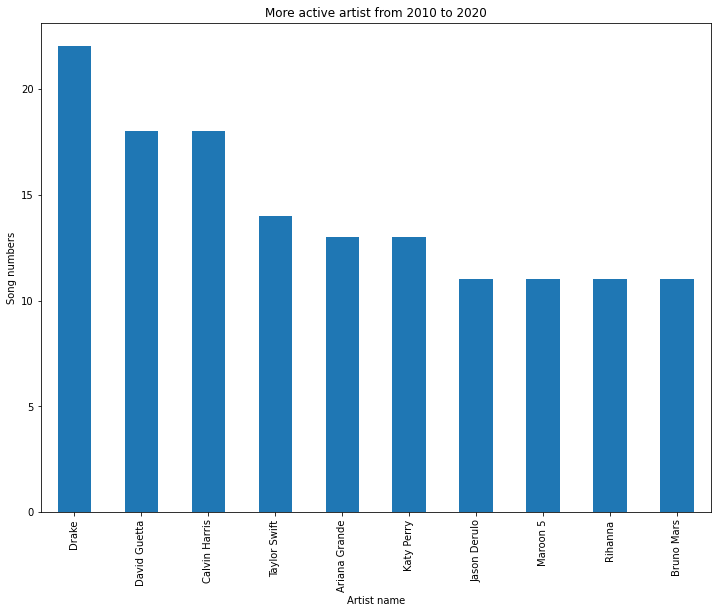

In [18]:
# Primer les asigno un contador, los filtro por los últimos 10 años y lo agrupo
df = df.assign(count=1) 
punto1 = df[df['year']>2009]
punto1 = punto1.groupby(by='artist').agg({'count':sum}) 
punto1 = punto1['count'].sort_values(ascending = False).head(10)

#ahora grafico
plt.figure(figsize = (12, 9))
punto1.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Artist name")
plt.title("More active artist from 2010 to 2020")


2 ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con
su duración? Halle la diferencia del tiempo promedio de ambos géneros.

La diferencia entre las medias es: 7.311032539682543 seg


Text(0.5, 1.0, 'Diference between means')

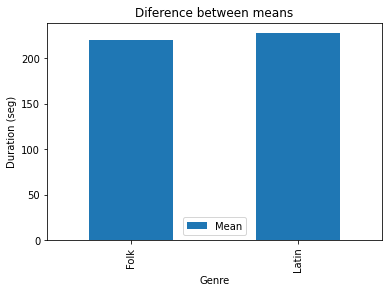

In [138]:
#Primero filtramos todos los generos que contienen la palabra "folk", nos aseguroamos que son 20 casos
latin = df[df['genre'].str.contains("latin")==True]
latin = latin["duration_ms"].mean()
latin = latin/1000
folk = df[df['genre'].str.contains("Folk/Acoustic")==True]
folk = folk["duration_ms"].mean()
folk = folk/1000

time_difference = latin - folk
print ("La diferencia entre las medias es:",time_difference,"seg")

d = {"Genre":["Folk","Latin"], "Mean":[folk,latin]}
punto2 = pd.DataFrame(data=d)
punto2.plot.bar(x='Genre',y='Mean')
plt.ylabel("Duration (seg)")
plt.xlabel("Genre")
plt.title("Diference between means")


3 Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la
cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

genre
pop                  16
pop- R&B             11
hip hop- pop- R&B     9
pop- rock             4
hip hop               4
Name: count, dtype: int64


Text(0.5, 1.0, 'Top5 of Genre in 2000')

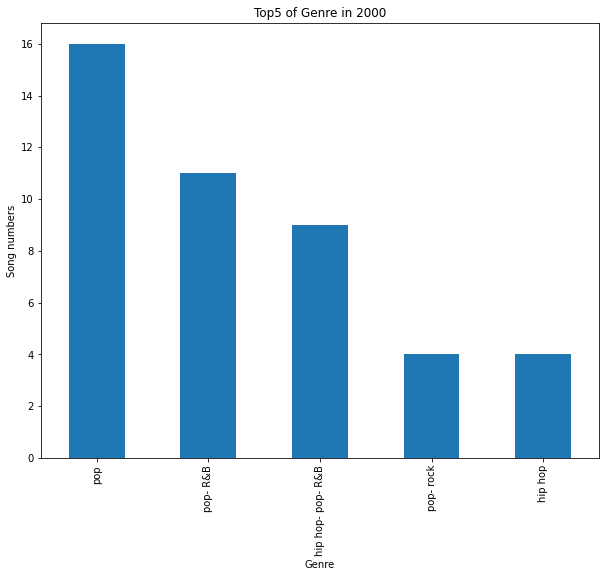

In [208]:
# Primero filtramos por los años de interes 2000
anio2000 = df[df['year']==2000]
anio2000 = anio2000.groupby(by='genre').agg({'count':sum}) 
anio2000 = anio2000['count'].sort_values(ascending = False).head(5)
print(anio2000)

plt.figure(figsize = (10, 8))
barras2000 = anio2000.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Genre")
plt.title("Top5 of Genre in 2000")

Text(0.5, 1.0, 'Top5 of Genre in 2005')

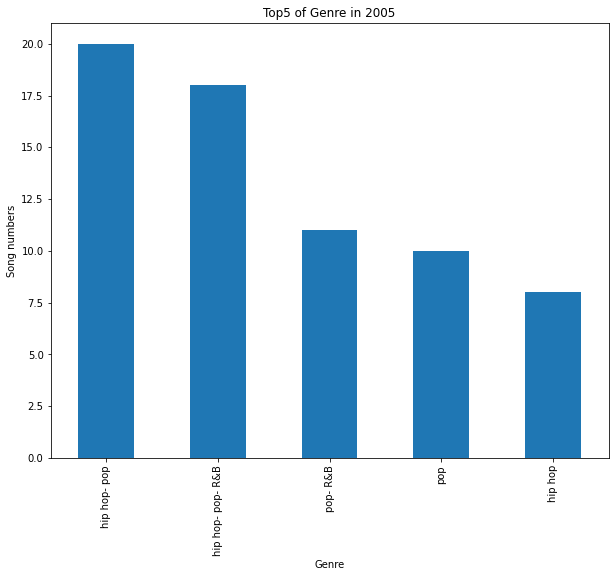

In [202]:
# 2005
anio2005 = df[df['year']==2005]
anio2005 = anio2005.groupby(by='genre').agg({'count':sum}) 
anio2005 = anio2005['count'].sort_values(ascending = False).head(5)

plt.figure(figsize = (10, 8))
anio2005.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Genre")
plt.title("Top5 of Genre in 2005")

Text(0.5, 1.0, 'Top5 of Genre in 2010')

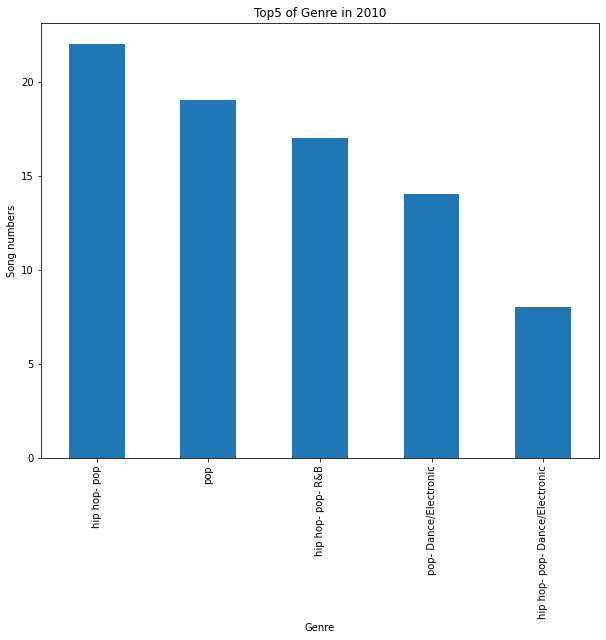

In [201]:
# 2010
anio2010 = df[df['year']==2010]
anio2010 = anio2010.groupby(by='genre').agg({'count':sum}) 
anio2010 = anio2010['count'].sort_values(ascending = False).head(5)

plt.figure(figsize = (10, 8))
anio2010.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Genre")
plt.title("Top5 of Genre in 2010")

Text(0.5, 1.0, 'Top5 of Genre in 2015')

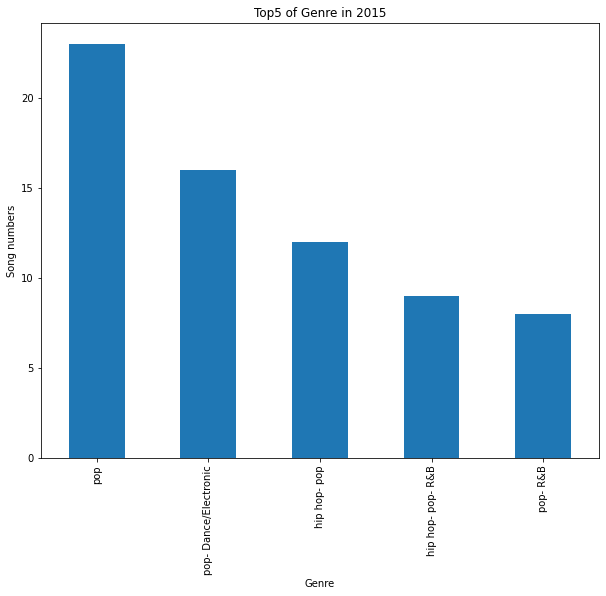

In [200]:
# 2015
anio2015 = df[df['year']==2015]
anio2015 = anio2015.groupby(by='genre').agg({'count':sum}) 
anio2015 = anio2015['count'].sort_values(ascending = False).head(5)

plt.figure(figsize = (10, 8))
anio2015.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Genre")
plt.title("Top5 of Genre in 2015")

Text(0.5, 1.0, 'Top5 of Genre in 2019')

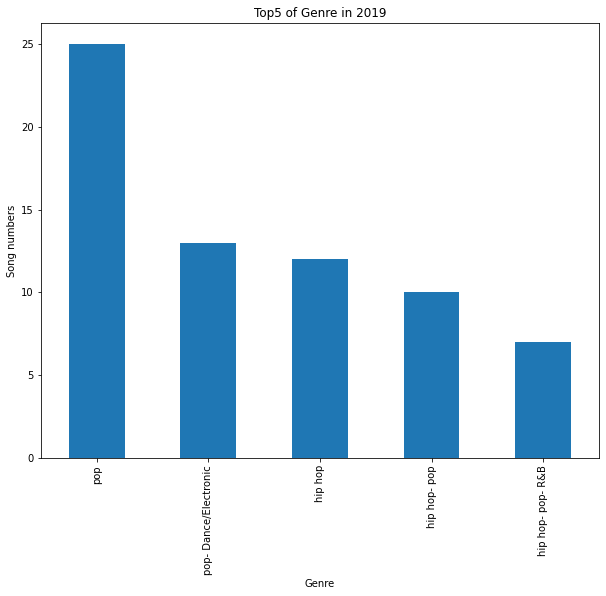

In [199]:
# 2019
anio2019 = df[df['year']==2019]
anio2019 = anio2019.groupby(by='genre').agg({'count':sum}) 
anio2019 = anio2019['count'].sort_values(ascending = False).head(5) 

plt.figure(figsize = (10, 8))
anio2019.plot(kind = "bar")
plt.ylabel("Song numbers")
plt.xlabel("Genre")
plt.title("Top5 of Genre in 2019")

Conclusión: el pop siempre ha estado presente en los top5 con un pico en el año 2019. En los años 2005 y 2010, el hip-hop fue protagonista, siendo el 2010 cuando apenas se comenzaba a ver el Dance/Electronic que se consolida en el 2015 y 2019.

4 ¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del
cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

5 Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre
la gráfica, ej: ¿existen tendencias?

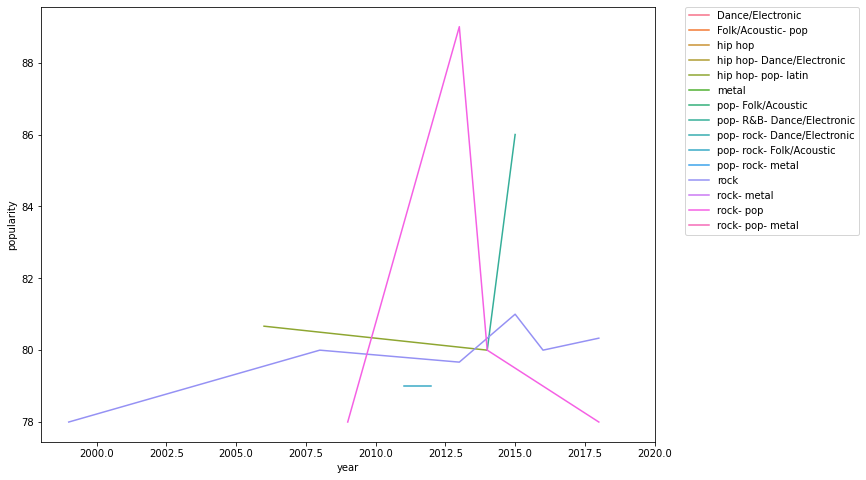

In [213]:
punto5 = df.groupby(["genre","year"], as_index=False)['popularity'].mean()
punto5 = punto5[punto5['popularity']>77]

plt.figure(figsize = (11, 8))
sns.lineplot(y="popularity",x="year",data=punto5, hue="genre",legend=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


Conclusión:la tendencia más estable es el rock, con una popularidad incremental desde el año 200 hasta el 2017. mientras que el rock-pop tuvo su creación entre el año 2007 y 2010, con un pico de popularidad en e 2012.
Por su parte el hip-hop surgió en el 2005 y fue decayendo hasta mediados del 2014. Finalmente el pop tuvo una subida de popularidad entre el año 2014 al 2015.

6 Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.
Concluya sobre su análisis.

In [243]:
#Primero filtramos todos los generos que contienen la palabra "rock", nos aseguroamos que son 233 casos
#dividimos tempo/1000 porque en la tabla la relación está en MiliBPM y lo dividimos sobre 120 para normalizarlo
rock = df[df['genre'].str.contains("rock")==True]
rockEnergy = rock["energy"].mean()
rockValence = rock["valence"].mean()
rockTempo = (rock["tempo"].mean()/1000)/120

In [250]:
#Segundo filtramos todos los generos que contienen la palabra "pop", nos aseguroamos que son 1632 casos
#dividimos tempo/1000 porque en la tabla la relación está en MiliBPM y lo dividimos sobre 120 para normalizarlo
pop = df[df['genre'].str.contains("pop")==True]
popEnergy = pop["energy"].mean()
popValence = pop["valence"].mean()
popTempo = (pop["tempo"].mean()/1000)/120

Text(0.5, 1.0, 'Diference rock and pop')

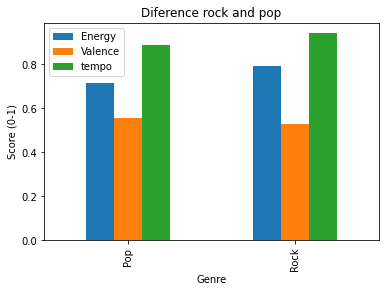

In [248]:
#creamos un dataframe con la información que tenemos de rock y pop
h = {"Genre":["Pop","Rock"], "Energy":[popEnergy,rockEnergy], "Valence":[popValence,rockValence],"tempo":[popTempo,rockTempo]}
punto6 = pd.DataFrame(data=h)
punto6.plot(x="Genre",kind = "bar")
plt.ylabel("Score (0-1)")
plt.xlabel("Genre")
plt.title("Diference rock and pop")

Conclusión: El rock tiene mas intensidad y BPM que el pop, con la misma nota de positivismo

7 Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra
dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.
Dado que el Pop es el género más popular, se requiere saber cómo se comporta la popularidad vs lo explicito de la canción

In [264]:
pop = df[df['genre'].str.contains("pop")==True]
pop["explicit"] = pop["explicit"].astype(bool)
pop["explicit"] = pop["explicit"].astype(int)

pop
#pop = pop.groupby("year")

#explicit = pop["explicit"].mean()
#popularity = pop["popularity"].mean()/100
punto7 = .groupby(["year"], as_index=False)['popularity|explicit'].mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: ignored